In [344]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [345]:
data = pd.read_csv("CAR DETAILS.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [346]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [347]:
data = data.drop(["seller_type"],axis=1)

In [348]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Manual,Second Owner


In [349]:
le = LabelEncoder()

In [350]:
len(data["name"].unique())

1491

In [351]:
data["fuel"] = le.fit_transform(data["fuel"])
data["transmission"] = le.fit_transform(data["transmission"])
data["owner"] = le.fit_transform(data["owner"])
data["name"] = le.fit_transform(data["name"])

In [352]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner
0,775,2007,60000,70000,4,1,0
1,1041,2007,135000,50000,4,1,0
2,505,2012,600000,100000,1,1,0
3,118,2017,250000,46000,4,1,0
4,279,2014,450000,141000,1,1,2


In [353]:
X= data.drop(["selling_price"],axis=1)
y=data["selling_price"]

In [354]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=20)

In [355]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [356]:
X.columns

Index(['name', 'year', 'km_driven', 'fuel', 'transmission', 'owner'], dtype='object')

In [357]:
model = Sequential()
model.add(Dense(200,input_dim =6,activation="relu",kernel_initializer="uniform"))
model.add(Dense(200,activation="relu",kernel_initializer="uniform"))
model.add(Dense(200,activation="relu",kernel_initializer="uniform"))
model.add(Dense(250,activation="relu",kernel_initializer="uniform"))
model.add(Dense(100,activation="relu",kernel_initializer="uniform"))
model.add(Dense(100,activation="relu",kernel_initializer="uniform"))
model.add(Dense(1,activation="relu",kernel_initializer="uniform"))

C:\Users\apasi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [358]:
model.compile(loss="mean_squared_error",optimizer = "Adam")
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 200)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 250)            │        50,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,351 (653.71 KB)

 Trainable params: 167,351 (653.71 KB)

 Non-trainable params: 0 (0.00 B)

In [359]:
training_history = model.fit(X_train,y_train,epochs=200,batch_size = 100,
                             validation_data=(X_test,y_test))

Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 611148890112.0000 - val_loss: 580764631040.0000
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 390624673792.0000 - val_loss: 594324160512.0000
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 363009146880.0000 - val_loss: 553532784640.0000
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 422590611456.0000 - val_loss: 498882412544.0000
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 310191030272.0000 - val_loss: 436203388928.0000
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 278559195136.0000 - val_loss: 431041478656.0000
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 357775343616.0000 - val_loss: 423629160448.0000
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 285145989120.0000 - val_loss: 422017695744.0000
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 267685838848.0000 - val_loss: 439367303168.0000
Epoch 10/200
33/33 ━━━━━━━━━━━━

In [360]:
hist = training_history.history
hist.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'LOss')

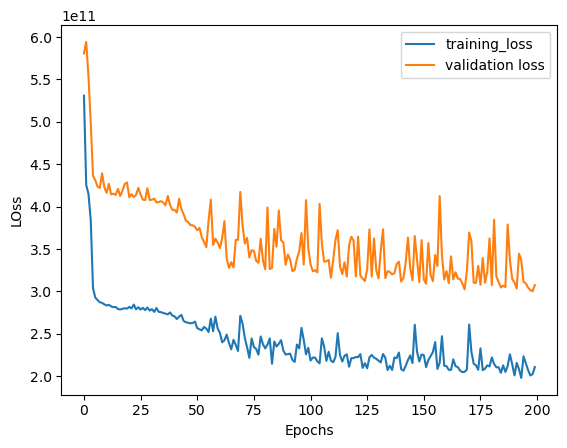

In [361]:
plt.plot(hist['loss'],label="training_loss")
plt.plot(hist["val_loss"],label="validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("LOss")

In [362]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [363]:
y_pred_test = model.predict(X_test_scaled)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [364]:
print(r2_score(y_pred_test,y_test))
print(mean_squared_error(y_pred_test,y_test))
print(mean_absolute_error(y_pred_test,y_test))

-65.97354869840973
603190143348.3678
481574.41262733005


## Example 2

In [365]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [366]:
df = pd.read_csv("employee_data.csv")
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [367]:
df.shape

(400, 5)

In [368]:
df.drop(["ID"],axis=1,inplace=True)

In [369]:
len(df["Position"].unique())

11

In [370]:
le1 =LabelEncoder()

In [371]:
df["Gender"] = le1.fit_transform(df["Gender"])
df["Position"] = le1.fit_transform(df["Position"])

In [372]:
df.head()

,Gender,Experience (Years),Position,Salary
0,0,4,2,109976
1,1,6,2,120088
2,1,17,10,181301
3,1,7,8,77530
4,0,13,8,152397


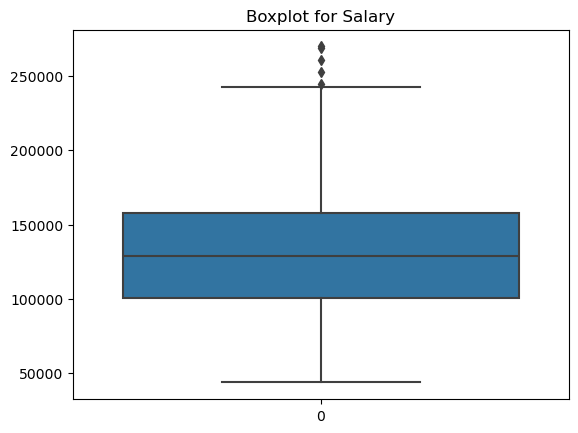

count       400.00000
mean     131701.19750
std       43351.50899
min       43643.00000
25%      100484.75000
50%      128561.50000
75%      157735.00000
max      269950.00000
Name: Salary, dtype: float64


In [373]:
# Check for outliers
import seaborn as sns

sns.boxplot(df["Salary"])
plt.title("Boxplot for Salary")
plt.show()

# Check summary statistics
print(df["Salary"].describe())


In [374]:
from numpy import log1p

df["Salary"] = log1p(df["Salary"])  # Apply log transformation


In [375]:
XX=df.drop(["Salary"],axis=1)
yy=df["Salary"]

In [376]:
X_train,X_test,y_train,y_test = train_test_split(XX,yy,test_size=0.25,random_state=42)

In [377]:
XX.shape,yy.shape

((400, 3), (400,))

In [378]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [379]:
model = Sequential()
model.add(Dense(16, input_dim=3, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(8, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))


C:\Users\apasi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [380]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [381]:

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [382]:
trainig_history = model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_test,y_test),callbacks=[early_stop])


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 52.5957 - val_loss: 33.3731
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.8749 - val_loss: 22.6646
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.5884 - val_loss: 20.2459
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.6760 - val_loss: 20.0517
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.4669 - val_loss: 19.0656
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.1495 - val_loss: 18.8164
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.3068 - val_loss: 19.2370
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.4852 - val_loss: 18.2568
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.4956 - val_loss: 18.8851
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.2443 - val_loss: 17.8489
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.9994 - val_loss: 17.4266
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [383]:
hist = training_history.history
hist.keys()

dict_keys(['loss', 'val_loss'])

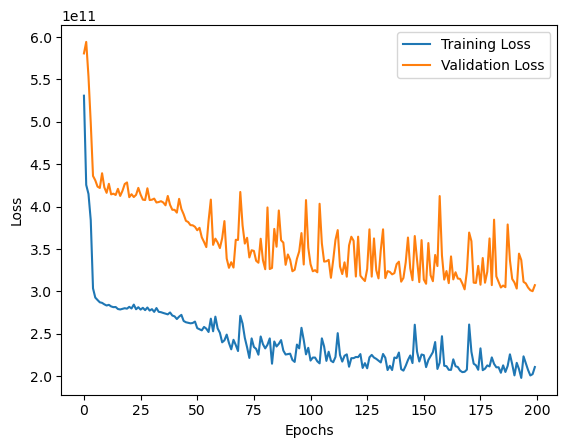

In [384]:
plt.plot(hist["loss"], label="Training Loss")
plt.plot(hist["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [385]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2 Score: -553.5018131451865
Mean Squared Error: 60.84722244143264
Mean Absolute Error: 7.681283658438101


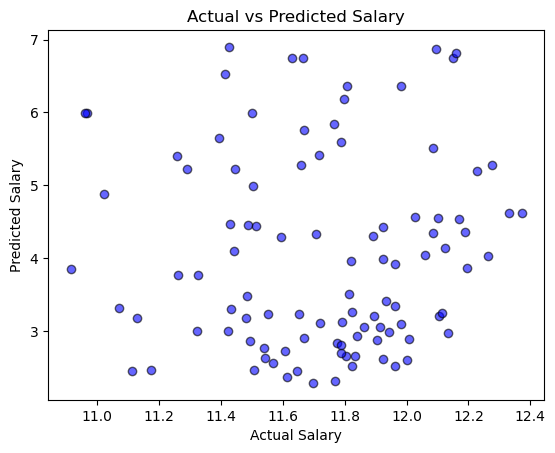

In [386]:
y_pred = model.predict(X_test_scaled).flatten()
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', edgecolors='k')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [387]:
import numpy as np
prediction = model.predict(np.array([[0, 4, 2]]))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[6.213742]], dtype=float32)

## Example 3

In [388]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df3 is your dataframe loaded from the CSV
df3 = pd.read_csv("Retail_Transaction_Dataset (1).csv")
df3.drop(["CustomerID", "TransactionDate", "StoreLocation"], axis=1, inplace=True)

# Create separate LabelEncoder instances for each column
le_product_id = LabelEncoder()
le_payment_method = LabelEncoder()
le_product_category = LabelEncoder()

df3["ProductID"] = le_product_id.fit_transform(df3["ProductID"])
df3["PaymentMethod"] = le_payment_method.fit_transform(df3["PaymentMethod"])
df3["ProductCategory"] = le_product_category.fit_transform(df3["ProductCategory"])

X = df3.drop(["TotalAmount"], axis=1)
y = df3["TotalAmount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


In [389]:
X_train.shape

(75000, 6)

In [390]:
mdl = Sequential()
mdl.add(Dense(60,input_dim=6,activation="relu",kernel_initializer="uniform"))
mdl.add(Dense(70,activation="relu",kernel_initializer="uniform"))
mdl.add(Dense(80,activation="relu",kernel_initializer="uniform"))
mdl.add(Dense(90,activation="relu",kernel_initializer="uniform"))
mdl.add(Dense(100,activation="relu",kernel_initializer="uniform"))
mdl.add(Dense(110,activation="relu",kernel_initializer="uniform"))
mdl.add(Dense(1,activation="linear",kernel_initializer="uniform"))


C:\Users\apasi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [391]:
optimizer = Adam(learning_rate=0.001)
mdl.compile(loss="mean_squared_error", optimizer=optimizer)
mdl.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 60)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 70)             │         4,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 80)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 100)            │         9,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 110)            │        11,110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │           111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,981 (148.36 KB)

 Trainable params: 37,981 (148.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = mdl.fit(X_train,y_train,epochs=80,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 27098.8418 - val_loss: 252.2661
Epoch 2/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 78.7172 - val_loss: 15.4083
Epoch 3/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 32.1616 - val_loss: 17.8664
Epoch 4/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 23.3190 - val_loss: 8.2589
Epoch 5/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 21.0125 - val_loss: 6.4979
Epoch 6/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 13.1644 - val_loss: 9.2583
Epoch 7/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 23.5494 - val_loss: 4.7740
Epoch 8/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 13.6146 - val_loss: 8.9970
Epoch 9/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 14.7095 - val_loss: 3.2888
Epoch 10/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 17.3192 - val_loss: 59.3150
Epoch 11/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 17.0043 - val_loss: 10.9163
Epoch 12/80
750/750 ━━━━━━━━━━━━

In [ ]:
hist =training_history.history
hist.keys()

In [ ]:
plt.plot(hist["loss"], label="Training Loss")
plt.plot(hist["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
y_pred = mdl.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
